In [24]:
import pandas as pd

In [25]:
#carregamento das bases de dados "order_details" e "orders"
order_details = pd.read_csv("order_details.csv", sep = ";")
orders = pd.read_csv("orders.csv", sep = ";")

In [26]:
order_details.head()

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [27]:
orders.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [28]:
#Caulcular o total de cada pedido
order_details["Total"] = order_details["quantity"] * order_details["unit_price"] * (1 - order_details["discount"])
#Juntar com a tabela de pedidos
orders_totals = order_details.groupby("order_id").agg({"Total": "sum"}).reset_index()

In [29]:
#Calculo do valor medio por pedido
average_order_value = orders_totals["Total"].mean()
print(f"Ticket Médio de Vendas: R${average_order_value:.2f}")

Ticket Médio de Vendas: R$1525.05


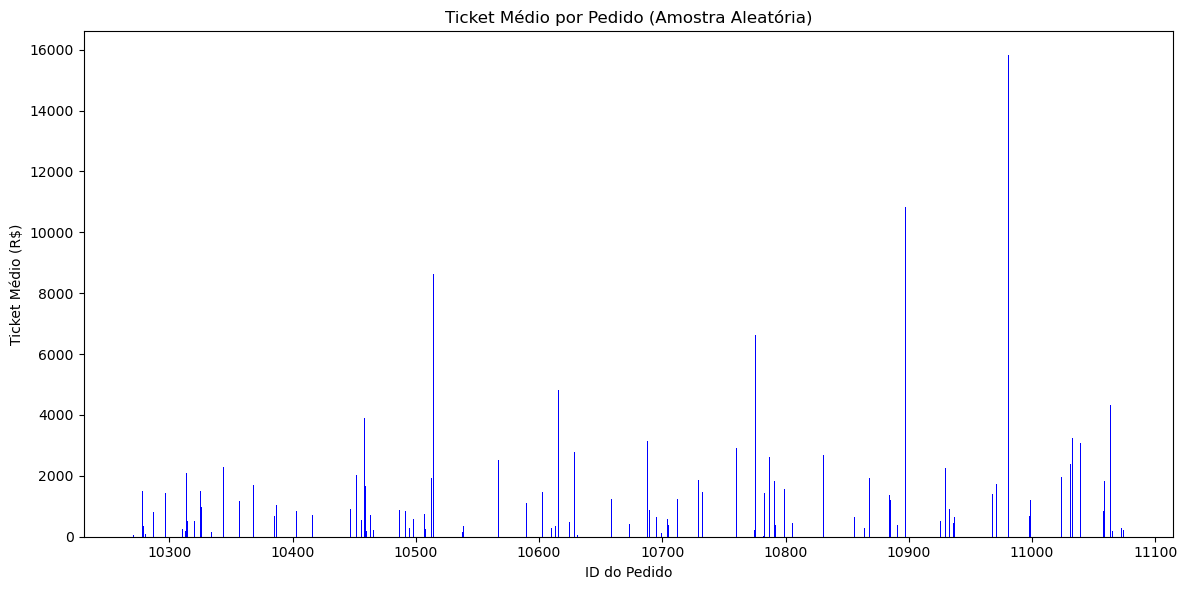

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
order_ids = orders_totals["order_id"]
ticket_medio = orders_totals["Total"]

# Amostragem aleatória de 100 IDs de pedido e seus respectivos valores médios
np.random.seed(42)  # Para reproducibilidade
indices_amostrados = np.random.choice(len(order_ids), size=100, replace=False)
order_ids_amostrados = order_ids.iloc[indices_amostrados]
ticket_medio_amostrado = ticket_medio.iloc[indices_amostrados]

# Criar o gráfico de barras com a amostra
plt.figure(figsize=(12, 6))
plt.bar(order_ids_amostrados, ticket_medio_amostrado, color='blue')

# Adicionar rótulos e título
plt.xlabel('ID do Pedido')
plt.ylabel('Ticket Médio (R$)')
plt.title('Ticket Médio por Pedido (Amostra Aleatória)')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [31]:
# Calcular o valor total de cada pedido
order_details['Total'] = order_details['quantity'] * order_details['unit_price'] * (1 - order_details['discount'])

# Juntar a tabela order_details com a tabela orders
orders_totals = pd.merge(orders, order_details, on='order_id')

# Converter a coluna 'order_date' para datetime
orders_totals['order_date'] = pd.to_datetime(orders_totals['order_date'])

# Agrupar os dados por mês
orders_totals['month'] = orders_totals['order_date'].dt.to_period('M')

# Calcular o valor total de vendas e o número de pedidos por mês
monthly_sales = orders_totals.groupby('month').agg({'Total': 'sum', 'order_id': 'nunique'}).rename(columns={'order_id': 'num_orders'})

# Calcular o ticket médio mensal
monthly_sales['average_order_value'] = monthly_sales['Total'] / monthly_sales['num_orders']

# Resetar o índice para facilitar a plotagem
monthly_sales = monthly_sales.reset_index()

print(monthly_sales[['month', 'average_order_value']])

      month  average_order_value
0   1996-07          1266.449773
1   1996-08          1019.411000
2   1996-09          1147.017391
3   1996-10          1442.912500
4   1996-11          1824.001800
5   1996-12          1459.342903
6   1997-01          1856.305152
7   1997-02          1327.021897
8   1997-03          1284.907333
9   1997-04          1710.740403
10  1997-05          1680.665313
11  1997-06          1212.093417
12  1997-07          1546.086591
13  1997-08          1432.959697
14  1997-09          1503.493041
15  1997-10          1756.558579
16  1997-11          1280.406147
17  1997-12          1487.467260
18  1998-01          1713.129282
19  1998-02          1841.023843
20  1998-03          1436.358288
21  1998-04          1672.955169
22  1998-05          1309.545036


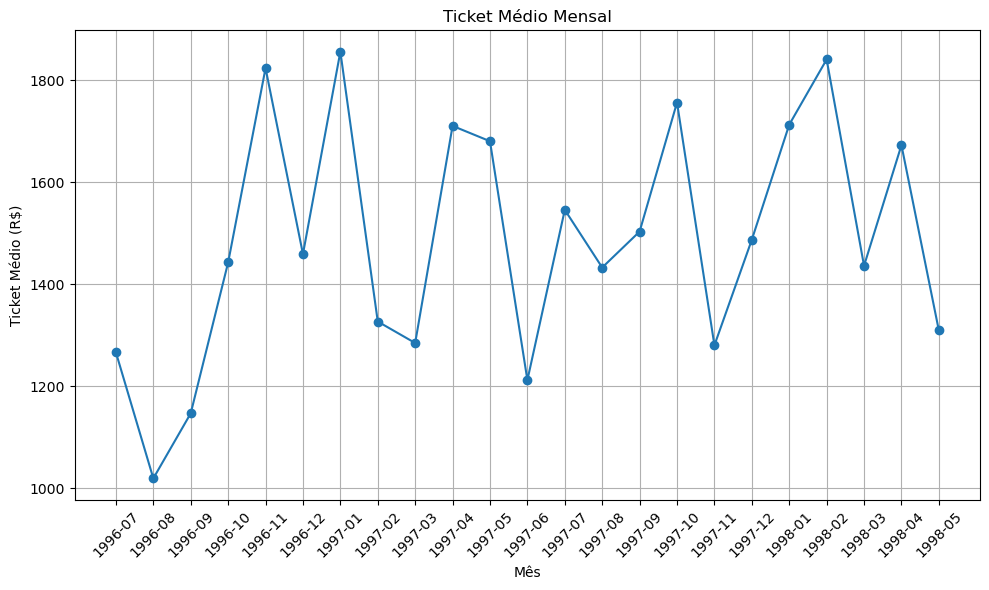

In [32]:
#gráfico de linhas para o ticket médio mensal
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['average_order_value'], marker='o', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Ticket Médio (R$)')
plt.title('Ticket Médio Mensal')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
#Calculo do churn
customers = pd.read_csv("customers.csv", sep = ";")
#definindo o periodo de tempo para calcular o churn (nesse caso, mensal)
orders["order_date"] = pd.to_datetime(orders["order_date"])
orders["month"] = orders["order_date"].dt.to_period("M")

#Identificar clientes ativos
active_customers = orders.groupby("month")["customer_id"].nunique()

#Identificar clientes churned
active_customers_previous_month = active_customers.shift(1, fill_value = 0)
churned_customers = active_customers_previous_month - active_customers
churn_rate = churned_customers / active_customers_previous_month
#visualizar a taxa de churn

print(churn_rate)

month
1996-07        -inf
1996-08    0.100000
1996-09   -0.055556
1996-10   -0.052632
1996-11   -0.050000
1996-12   -0.190476
1997-01   -0.080000
1997-02    0.222222
1997-03   -0.142857
1997-04   -0.125000
1997-05    0.037037
1997-06    0.038462
1997-07    0.000000
1997-08   -0.200000
1997-09    0.100000
1997-10   -0.037037
1997-11    0.035714
1997-12   -0.370370
1998-01   -0.108108
1998-02    0.146341
1998-03   -0.400000
1998-04   -0.040816
1998-05    0.745098
Freq: M, Name: customer_id, dtype: float64


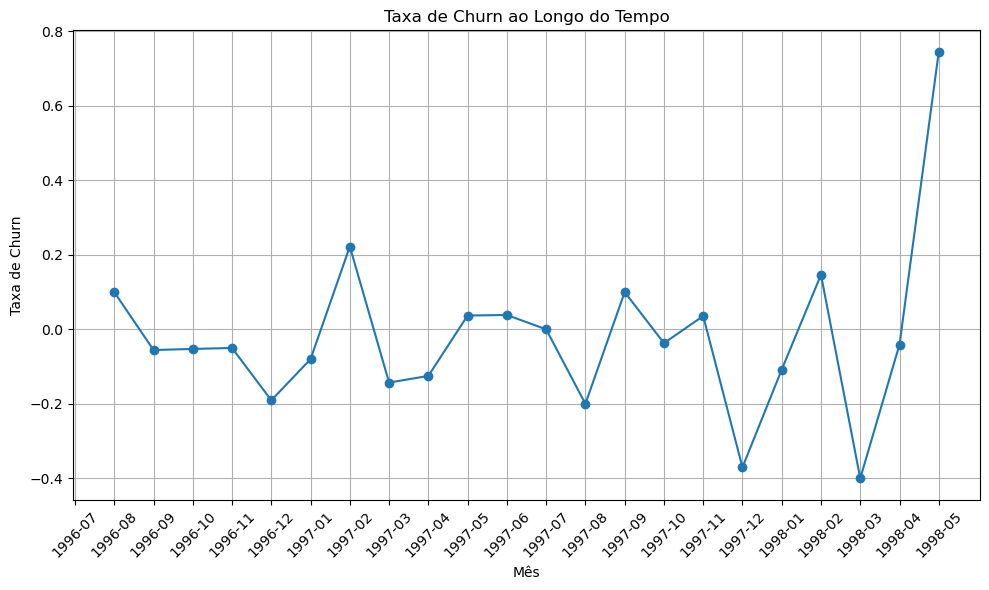

In [34]:
#Visualizacao grafica
plt.figure(figsize=(10, 6))
plt.plot(churn_rate.index.astype(str), churn_rate.values, marker='o', linestyle='-')
plt.xlabel("Mês")
plt.ylabel("Taxa de Churn")
plt.title("Taxa de Churn ao Longo do Tempo")
# Formatação do eixo x para exibir apenas os meses
plt.xticks(rotation=45)
# Exibição do gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
products = pd.read_csv("products.csv", sep = ";")
products.head()

,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


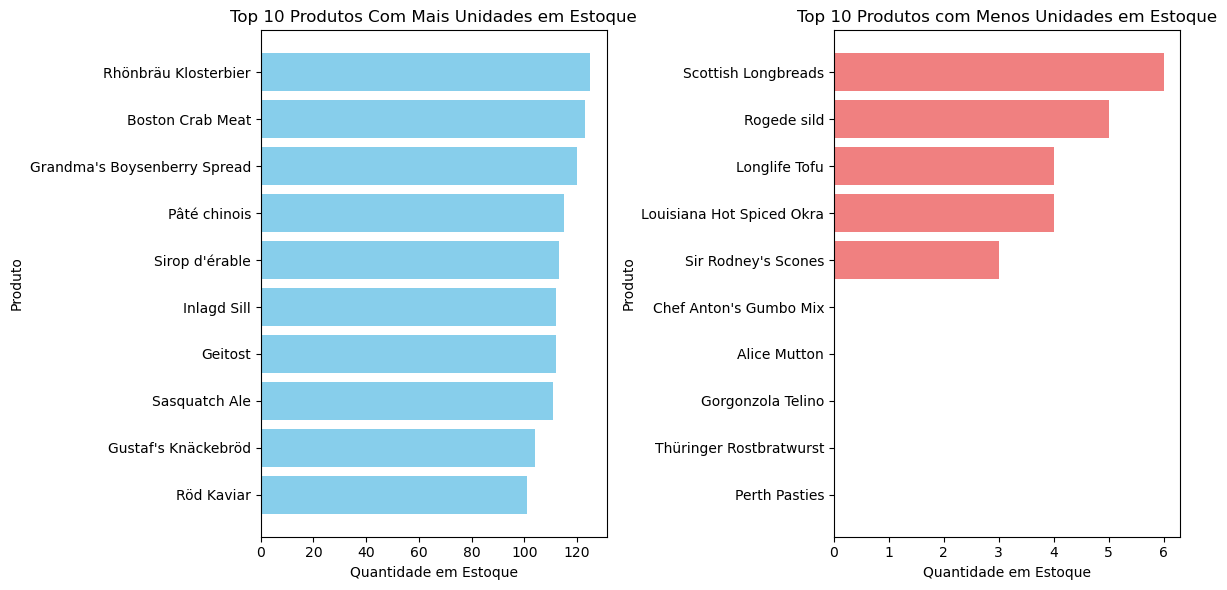

In [36]:
#Top 10 produtos com mais unidades em estoque
#Ordenar os produtos por quantidade em estoque (ordem decrescente)
products_sorted = products.sort_values(by="units_in_stock", ascending = False)
top_products = products_sorted.head(10)
bottom_products = products_sorted.tail(10)
#Grafico de parras para visualizar os produtos com mais unidades em estoque
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_products["product_name"], top_products["units_in_stock"], color = "skyblue")
plt.xlabel("Quantidade em Estoque")
plt.ylabel("Produto")
plt.title("Top 10 Produtos Com Mais Unidades em Estoque")
plt.gca().invert_yaxis() #inverter o eixo y para que o produto com maior quantidade fique no topo

#Grafico de barras para os top 10 produtos com menos unidades em estoque
plt.subplot(1,2,2)
plt.barh(bottom_products["product_name"], bottom_products["units_in_stock"], color = "lightcoral")
plt.xlabel("Quantidade em Estoque")
plt.ylabel("Produto")
plt.title("Top 10 Produtos com Menos Unidades em Estoque")
plt.gca().invert_yaxis()  #inverter o eixo y para que o produto com maior quantidade fique no topo

plt.tight_layout()
plt.show()

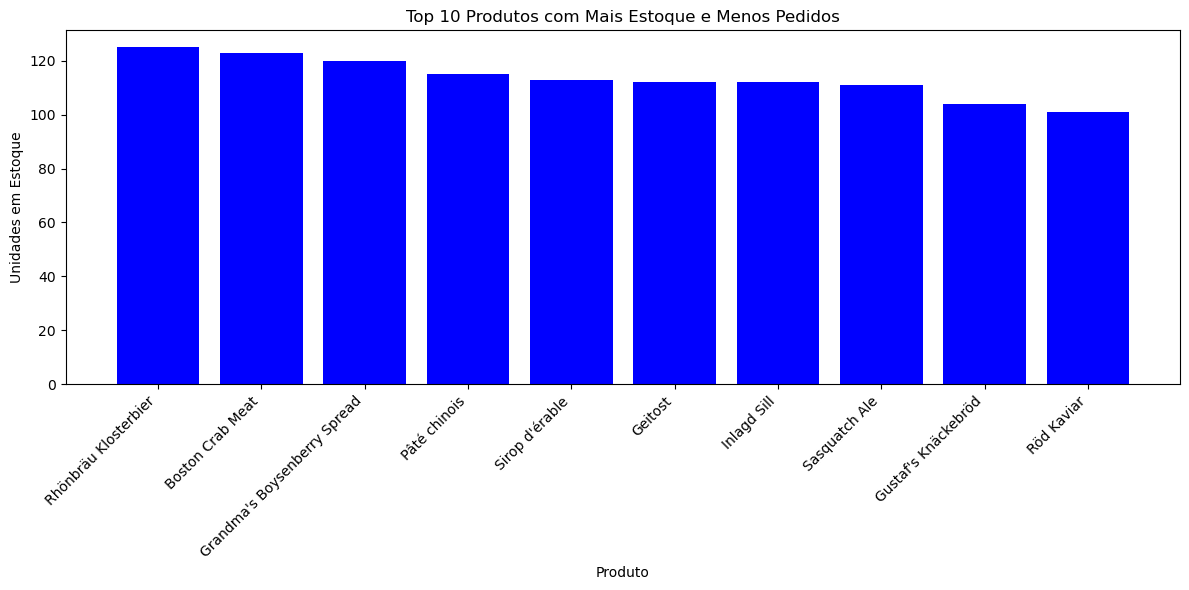

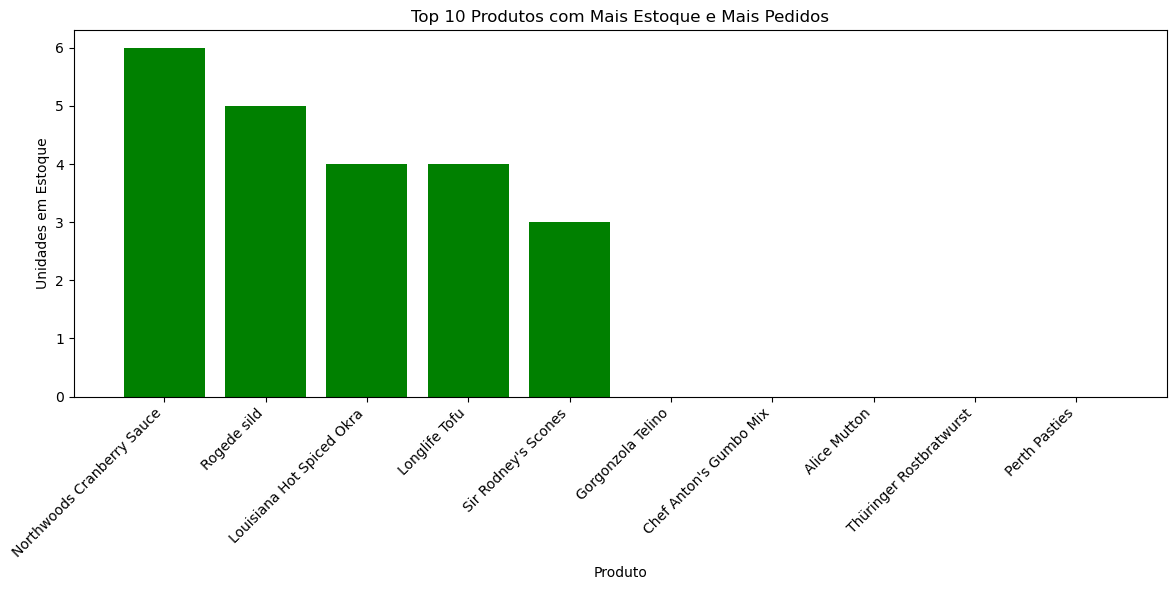

In [38]:
# Ordenar os produtos para encontrar os top 10 com mais estoque e menos pedidos
top_10_most_stock_least_order = products.sort_values(by = ['units_in_stock', 'units_on_order'], ascending = [False, True]).head(10)
# Ordenar os produtos para encontrar os top 10 com mais estoque e mais pedidos
top_10_most_stock_most_order = products.sort_values(by = ['units_in_stock', 'units_on_order'], ascending = [False, False]).tail(10)                                                     

# Criar gráfico de barras para top 10 com mais estoque e menos pedidos
plt.figure(figsize = (12,6))
plt.bar(top_10_most_stock_least_order['product_name'], top_10_most_stock_least_order['units_in_stock'], color='blue')
plt.xlabel('Produto')
plt.ylabel('Unidades em Estoque')
plt.title('Top 10 Produtos com Mais Estoque e Menos Pedidos')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Criar gráfico de barras para top 10 com mais estoque e mais pedidos
plt.figure(figsize = (12,6))
plt.bar(top_10_most_stock_most_order['product_name'], top_10_most_stock_most_order['units_in_stock'], color='green')
plt.xlabel('Produto')
plt.ylabel('Unidades em Estoque')
plt.title('Top 10 Produtos com Mais Estoque e Mais Pedidos')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [39]:
# Calcular a quantidade total vendida de cada produto
product_sales = order_details.groupby('product_id').agg({'quantity': 'sum'}).reset_index()

# Juntar com a tabela de produtos para obter os nomes dos produtos
product_sales = pd.merge(product_sales, products[['product_id', 'product_name']], on='product_id')

# Classificar os produtos pela quantidade vendida
product_sales_sorted = product_sales.sort_values(by='quantity', ascending=False)

# Top 10 produtos mais vendidos
top_10_most_sold = product_sales_sorted.head(10)

# Top 10 produtos menos vendidos
top_10_least_sold = product_sales_sorted.tail(10)

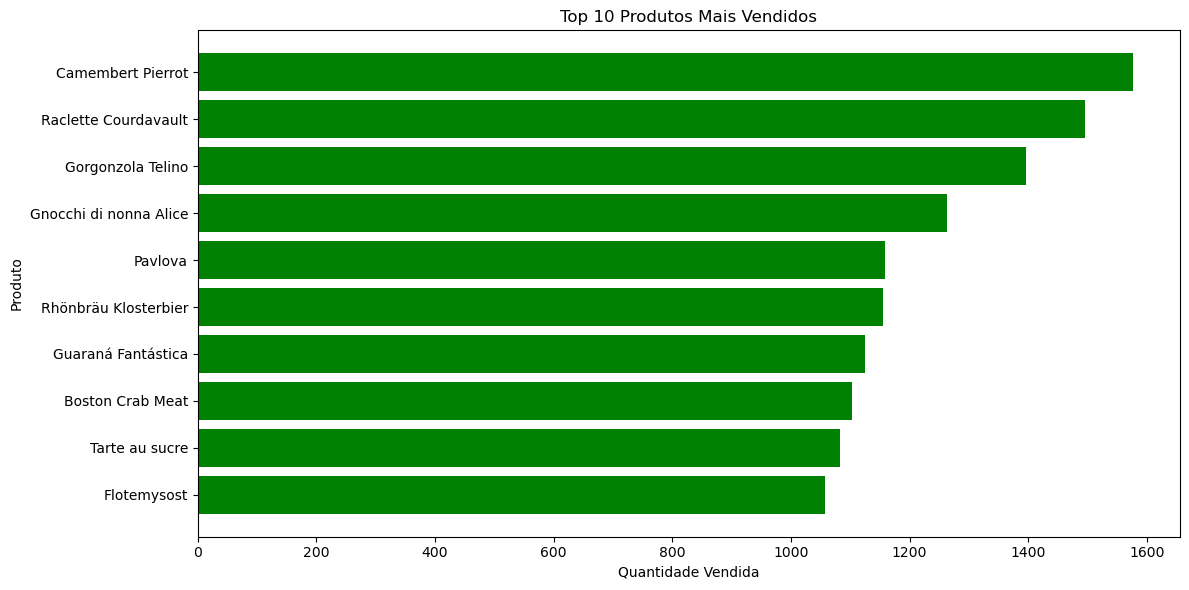

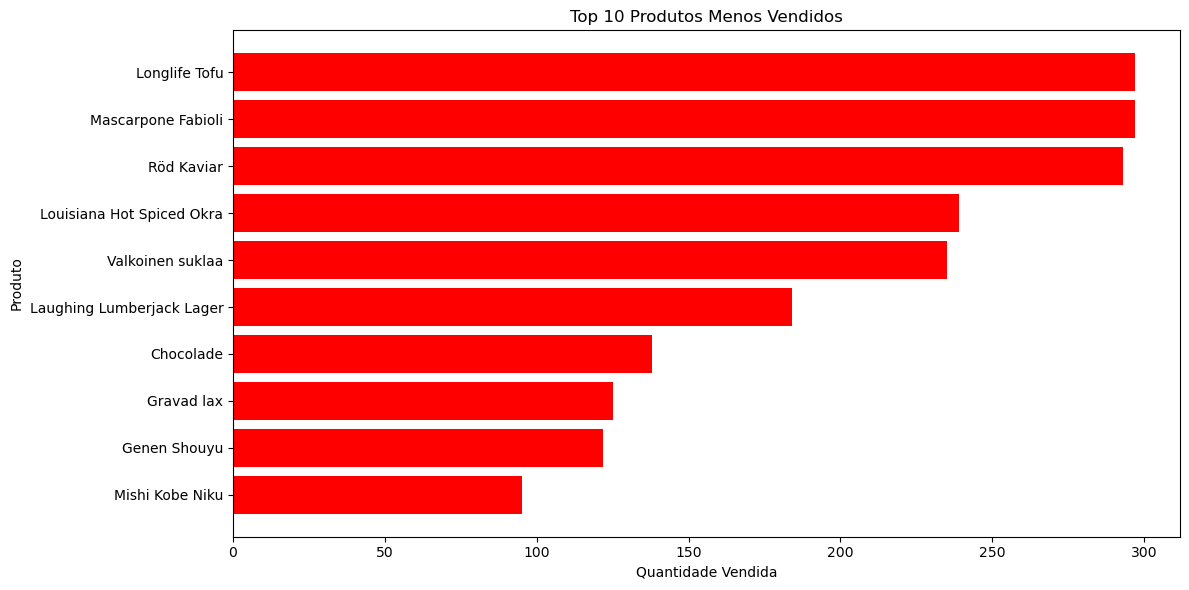

In [40]:
# Gráfico para os Top 10 Produtos Mais Vendidos
plt.figure(figsize=(12, 6))
plt.barh(top_10_most_sold['product_name'], top_10_most_sold['quantity'], color='green')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Vendidos')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar o produto mais vendido no topo
plt.tight_layout()
plt.show()

# Gráfico para os Top 10 Produtos Menos Vendidos
plt.figure(figsize=(12, 6))
plt.barh(top_10_least_sold['product_name'], top_10_least_sold['quantity'], color='red')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Menos Vendidos')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar o produto menos vendido no topo
plt.tight_layout()
plt.show()

In [41]:
# Calcular a quantidade total vendida de cada produto
product_sales = order_details.groupby('product_id').agg({'quantity': 'sum'}).reset_index()

# Juntar com a tabela de produtos para obter os nomes dos produtos, quantidade em estoque e quantidade em pedidos
product_sales_stock = pd.merge(product_sales, products[['product_id', 'product_name', 'units_in_stock', 'units_on_order']], on='product_id')

# Classificar os produtos pela quantidade vendida
product_sales_stock_sorted = product_sales_stock.sort_values(by='quantity', ascending=False)

# Top 10 produtos mais vendidos e suas quantidades em estoque e em pedidos
top_10_most_sold_stock = product_sales_stock_sorted.head(10)

# Top 10 produtos menos vendidos e suas quantidades em estoque e em pedidos
top_10_least_sold_stock = product_sales_stock_sorted.tail(10)

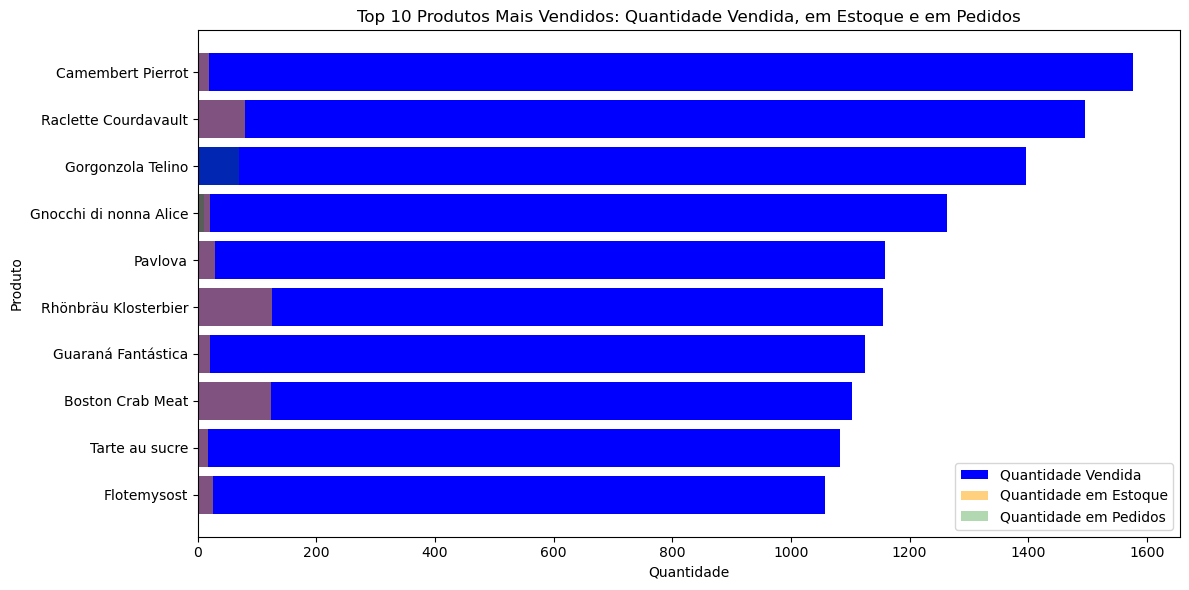

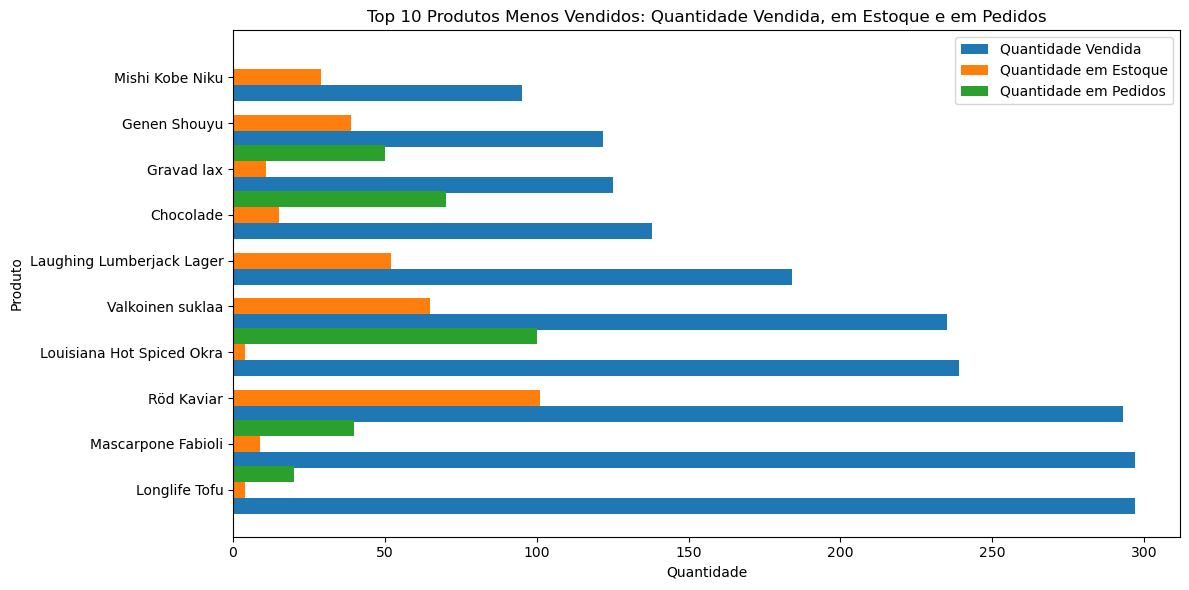

In [42]:
# Gráfico para os Top 10 Produtos Mais Vendidos
plt.figure(figsize=(12, 6))
plt.barh(top_10_most_sold_stock['product_name'], top_10_most_sold_stock['quantity'], color='blue', label='Quantidade Vendida')
plt.barh(top_10_most_sold_stock['product_name'], top_10_most_sold_stock['units_in_stock'], color='orange', label='Quantidade em Estoque', alpha=0.5)
plt.barh(top_10_most_sold_stock['product_name'], top_10_most_sold_stock['units_on_order'], color='green', label='Quantidade em Pedidos', alpha=0.3)
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Vendidos: Quantidade Vendida, em Estoque e em Pedidos')
plt.legend()
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar o produto mais vendido no topo
plt.tight_layout()
plt.show()

# Visualizar graficamente a relação entre vendas, estoque e pedidos para os 10 menos vendidos
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Índices das barras
index = range(len(top_10_least_sold_stock))

# Barras para quantidade vendida
plt.barh(index, top_10_least_sold_stock['quantity'], bar_width, label='Quantidade Vendida')

# Barras para quantidade em estoque
plt.barh([i + bar_width for i in index], top_10_least_sold_stock['units_in_stock'], bar_width, label='Quantidade em Estoque')

# Barras para quantidade em pedidos
plt.barh([i + 2 * bar_width for i in index], top_10_least_sold_stock['units_on_order'], bar_width, label='Quantidade em Pedidos')

# Adicionar rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Menos Vendidos: Quantidade Vendida, em Estoque e em Pedidos')
plt.yticks([i + bar_width for i in index], top_10_least_sold_stock['product_name'])

# Exibir a legenda
plt.legend()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()
